In [1]:
import ROOT as r

# turns off popup plots
#r.gROOT.SetBatch(True)



Welcome to JupyROOT 6.20/04


In [2]:
# for drawing plots later directly into the notebook
c = r.TCanvas()

In [3]:
chain1 = r.TChain()
# arguments: filename, number of entries (-1 for all, or 1000 events), tree name
chain1.AddFile("../jjjy213/sig_cut3_1000.root", -1, "my_ttree")

chain4 = r.TChain()
chain4.AddFile("../jjjy213/bkg_cut3_1000.root", -1, "my_ttree")


1

In [4]:
chain1.GetEntries()

4099

In [5]:
chain = r.TChain()
# arguments: filename, number of entries (-1 for all), tree name
chain.AddFile("../jjjy213/sig_cut3_1000.root", -1, "my_ttree")
chain.AddFile("../jjjy213/bkg_cut3_1000.root", -1, "my_ttree")


1

In [6]:
missingEnergyOfEventCMS = r.RooRealVar("Bsig_d0_missingEnergyOfEventCMS", "Bsig_d0_missingEnergyOfEventCMS", 3,  -1, 7)
rds = r.RooDataSet("data", "B+#rightarrow K^{+}nunubar simulation", chain, r.RooArgSet(missingEnergyOfEventCMS))
rds_sig = r.RooDataSet("data", "B+#rightarrow K^{+}nunubar simulation", chain1, r.RooArgSet(missingEnergyOfEventCMS))
rds_bkg = r.RooDataSet("data", "B+#rightarrow K^{+}nunubar simulation", chain4, r.RooArgSet(missingEnergyOfEventCMS))



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 6 out of range events
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 6 out of range events


In [7]:
mean_sig = r.RooRealVar("mean_gauss_1", "mean of gaussian", 2.95, -1, 7)
sigma_sig = r.RooRealVar("sigma_gauss_1", "width of gaussian", 0.1, 0, 10)
mean_sig2  = r.RooRealVar("mean_gauss_2", "mean of gaussian", 3.69, -1, 7)
sigma_sig2 = r.RooRealVar("sigma_gauss_2", "width of gaussian", 0.1, 0, 10)

#parameter_landau_sig = r.RooRealVar("mean_landau", "c parameter of landau", 2.56, -9999, 9999)
#sigma_landau_sig = r.RooRealVar("sigma_landau", "mu parameter of landau", 0.4, 0.0001, 99999)


mean_bkg = r.RooRealVar("mean_bkg", "mean of gaussian", 2.91, -10, 10)
sigma_bkg = r.RooRealVar("sigma_bkg", "width of gaussian", 0.8, 0, 10)
#mean_bkg2 = r.RooRealVar("mean_bkg", "mean of gaussian", 3.0, -10, 10)
#sigma_bkg2 = r.RooRealVar("sigma_bkg", "width of gaussian", 0.75, 0, 10)

#infinity = float("inf")
import math

parameter_landau = r.RooRealVar("mean_landau", "c parameter of landau", 2.56, -9999, 9999)
sigma_landau = r.RooRealVar("sigma_landau", "mu parameter of landau", 0.4, 0.0001, 99999)

In [8]:
gauss_sig = r.RooGaussian("gauss", "gaussian PDF", missingEnergyOfEventCMS, mean_sig, sigma_sig)
gauss_sig2 = r.RooGaussian("gauss2", "gaussian PDF2", missingEnergyOfEventCMS, mean_sig2, sigma_sig2)
#landau_sig = r.RooLandau("landau_bkg", "landau PDF", missingEnergyOfEventCMS, parameter_landau_sig, sigma_landau_sig)

landau_bkg = r.RooLandau("landau_bkg", "landau PDF", missingEnergyOfEventCMS, parameter_landau, sigma_landau)
gauss_bkg = r.RooGaussian("gauss_bkg", "gaussian PDF_bkg", missingEnergyOfEventCMS, mean_bkg, sigma_bkg)
#gauss_bkg2 = r.RooGaussian("gauss_bkg", "gaussian PDF_bkg", missingEnergyOfEventCMS, mean_bkg2, sigma_bkg2)

In [9]:
sig2_frac = r.RooRealVar("sig2frac", "fraction of background(first one)", 0.5, 0.0, 1.0)
#sig_sum = r.RooAddPdf("sig_sum", "gauss + gauss2", r.RooArgList(gauss_sig2, gauss_sig), r.RooArgList(sig2_frac))


Nsig_1 = r.RooRealVar("Signal yield 1","Signal yield 1", 0.5, 0, 1)
#Nsig_2 = r.RooRealVar("Signal yield 2","Signal yield 2", 3000, 0, 15000)

sig_sum = r.RooAddPdf("sig_sum", "gauss + landau", r.RooArgList(gauss_sig2, gauss_sig), r.RooArgList(Nsig_1))


Nbkg_1 = r.RooRealVar("bkg yield 1","bkg yield 1", 0.5, 0, 1)
#Nbkg_2 = r.RooRealVar("bkg yield 2","bkg yield 2", 15000, 0, 50000)

bkg2_frac = r.RooRealVar("bkg2frac", "fraction of background(first one)", 0.5, 0.0, 1.0)
bkg_sum = r.RooAddPdf("bkg_sum", "gauss_bkg + landau", r.RooArgList(landau_bkg, gauss_bkg), r.RooArgList(Nbkg_1))

In [10]:
# yield. Add them in model(pdf)

# see ppt manual with search 'nsig'. For example, 195p.
bkgfrac = r.RooRealVar("bkgfrac", "fraction of background(first one)", 0.5, 0.0, 1.0)

Nsig = r.RooRealVar("Signal yield","Signal yield", 500, 0, 99000)  
Nbkg = r.RooRealVar("Bkg yield","Background yield", 7000, 0, 25000)  

In [11]:
model = r.RooAddPdf("bkg", "sig + bkg", r.RooArgList(bkg_sum, sig_sum), r.RooArgList(Nbkg, Nsig))


#model = r.RooAddPdf("bkg", "sig + bkg", r.RooArgList(bkg_sum, sig_sum), r.RooArgList(bkgfrac))

In [12]:
sig_sum.fitTo(rds_sig)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss2,gauss)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal yield 1   5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean_gauss_1   2.95000e+00  8.00000e-01   -1.00000e+00  7.00000e+00
     3 mean_gauss_2   3.69000e+00  8.00000e-01   -1.00000e+00  7.00000e+00
     4 sigma_gauss_1   1.00000e-01  5.00000e-02    0.00000e+00  1.00000e+01
     5 sigma_gauss_2   1.00000e-01  5.00000e-02    0.00000e+00  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 *

In [13]:
mean_sig.Print()
mean_sig2.Print()
sigma_sig.Print()
sigma_sig2.Print()
#sig2_frac.Print()

RooRealVar::mean_gauss_1 = 2.94706 +/- 0.0382018  L(-1 - 7) 
RooRealVar::mean_gauss_2 = 3.69853 +/- 0.050064  L(-1 - 7) 
RooRealVar::sigma_gauss_1 = 0.434317 +/- 0.031925  L(0 - 10) 
RooRealVar::sigma_gauss_2 = 0.73512 +/- 0.0161256  L(0 - 10) 


In [14]:
mean_sig.setConstant(True)
sigma_sig.setConstant(True)
mean_sig2.setConstant(True)
sigma_sig2.setConstant(True)
Nsig_1.setConstant(True)
print(Nsig_1)

RooRealVar::Signal yield 1 = 0.689697 +/- 0.0536261 C  L(0 - 1) 



In [15]:
bkg_sum.fitTo(rds_bkg)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (landau_bkg,gauss_bkg)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 bkg yield 1   5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean_bkg     2.91000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     3 mean_landau   2.56000e+00  1.99980e+03   -9.99900e+03  9.99900e+03
     4 s

In [16]:
parameter_landau.Print()
sigma_landau.Print()
mean_bkg.Print()
sigma_bkg.Print()

RooRealVar::mean_landau = 2.55883 +/- 0.0813646  L(-9999 - 9999) 
RooRealVar::sigma_landau = 0.421658 +/- 0.0397969  L(0.0001 - 99999) 
RooRealVar::mean_bkg = 2.91498 +/- 0.0144904  L(-10 - 10) 
RooRealVar::sigma_bkg = 0.812534 +/- 0.00903393  L(0 - 10) 


In [17]:
parameter_landau.setConstant(True)
#sigma_landau.setConstant(True)
mean_bkg.setConstant(True)
#sigma_bkg.setConstant(True)
Nbkg_1.setConstant(True)


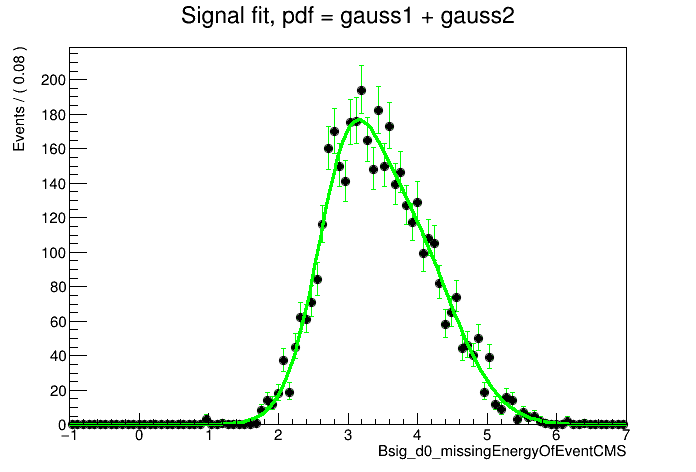

In [18]:
# only signal 
debug = missingEnergyOfEventCMS.frame()
debug.SetTitle("Signal fit, pdf = gauss1 + gauss2")
rds_sig.plotOn(debug, r.RooFit.LineColor(r.kGreen))

sig_sum.plotOn(debug, r.RooFit.LineColor(r.kGreen))
debug.Draw()
c.Draw()


[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)


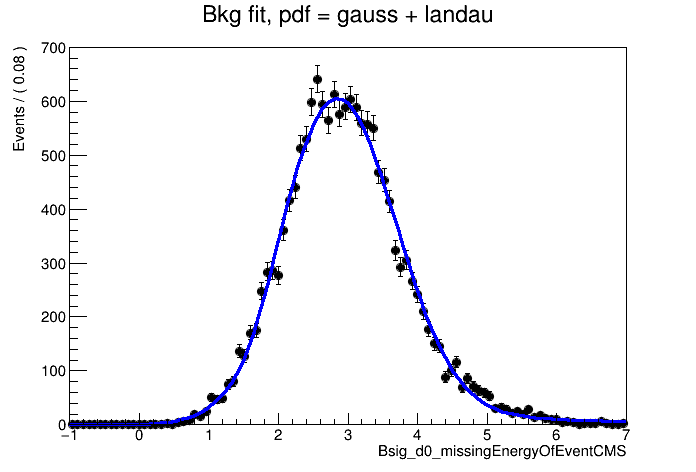

In [19]:
# only bkg 
debug = missingEnergyOfEventCMS.frame()
debug.SetTitle("Bkg fit, pdf = gauss + landau")

rds_bkg.plotOn(debug)

bkg_sum.plotOn(debug)

debug.Draw()
c.Draw()



In [20]:
model.fitTo(rds)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (sig_sum)
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (landau_bkg,gauss_bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE    

In [21]:
print(Nsig_1)

RooRealVar::Signal yield 1 = 0.689697 +/- 0.0536261 C  L(0 - 1) 



In [22]:
# Summary of fit result
# COVARIANCE MATRIX CALCULATED SUCCESSFULLY
# bkg yield: 1304640 (correct: 1292312)
# signal yield: 36932 (correct: isSignal=1 case 38532)

In [23]:
mean_sig.Print()
mean_sig2.Print()
sigma_sig.Print()
sigma_sig2.Print()

RooRealVar::mean_gauss_1 = 2.94706 +/- 0.0382018 C  L(-1 - 7) 
RooRealVar::mean_gauss_2 = 3.69853 +/- 0.050064 C  L(-1 - 7) 
RooRealVar::sigma_gauss_1 = 0.434317 +/- 0.031925 C  L(0 - 10) 
RooRealVar::sigma_gauss_2 = 0.73512 +/- 0.0161256 C  L(0 - 10) 


In [24]:
parameter_landau.Print()
sigma_landau.Print()
mean_bkg.Print()
sigma_bkg.Print()


RooRealVar::mean_landau = 2.55883 +/- 0.0813646 C  L(-9999 - 9999) 
RooRealVar::sigma_landau = 0.408648 +/- 0.0329244  L(0.0001 - 99999) 
RooRealVar::mean_bkg = 2.91498 +/- 0.0144904 C  L(-10 - 10) 
RooRealVar::sigma_bkg = 0.810827 +/- 0.00859253  L(0 - 10) 


[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(bkg) directly selected PDF components: (bkg_sum)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(bkg) indirectly selected PDF components: (landau_bkg,gauss_bkg)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(bkg) directly selected PDF components: (sig_sum)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(bkg) indirectly selected PDF components: (gauss2,gauss)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)


Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data (Potential memory leak).


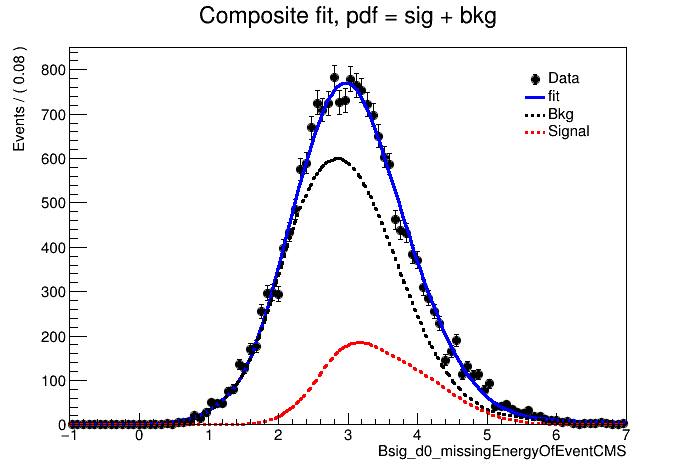

In [25]:
xframe = missingEnergyOfEventCMS.frame(r.RooFit.Title("Composite fit, pdf = sig + bkg"))
rds.plotOn(xframe, r.RooFit.Name("data"))
#rds_sig.plotOn(xframe, r.RooFit.LineColor(r.kRed))

model.plotOn(xframe, r.RooFit.Name("fit"))
ras_bkg = r.RooArgSet(bkg_sum)
ras_sig = r.RooArgSet(sig_sum)
model.plotOn(
    xframe,
    r.RooFit.Components(ras_bkg),
    r.RooFit.LineStyle(r.kDashed),
    r.RooFit.LineColor(r.kBlack),
    r.RooFit.Name("bkg")
)
model.plotOn(
    xframe,
    r.RooFit.Components(ras_sig),
    r.RooFit.LineStyle(r.kDashed),
    r.RooFit.LineColor(r.kRed),
    r.RooFit.Name("sig")
)
xframe.Draw()

legend = r.TLegend(0.75, 0.7, 0.9, 0.85)
legend.SetBorderSize(0)
legend.AddEntry("data", "Data", "PE")
legend.AddEntry("fit", "fit", "L")
legend.AddEntry("bkg", "Bkg", "L")
legend.AddEntry("sig", "Signal", "L")
legend.Draw()

c.Draw()

In [26]:
frame1 = missingEnergyOfEventCMS.frame(r.RooFit.Title("Data with fitted pdf"), r.RooFit.Bins(40))
rds.plotOn(frame1, r.RooFit.DataError(r.RooAbsData.SumW2))
model.plotOn(frame1)

<ROOT.RooPlot object ("frame_Bsig_d0_missingEnergyOfEventCMS_6ac2840") at 0x6ac2840>

[#1] INFO:NumericIntegration -- RooRealIntegral::init(landau_bkg_Int[Bsig_d0_missingEnergyOfEventCMS]) using numeric integrator RooIntegrator1D to calculate Int(Bsig_d0_missingEnergyOfEventCMS)


In [27]:
hpull = frame1.pullHist()

[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 0 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 1 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 2 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 3 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 4 has zero error, setting residual to zero
[#0] WARNING:Plotting -- RooHist::makeResisHist(h_data) WARNING: point 5 has zero error, setting residual to zero


In [28]:
hresid = frame1.residHist()

In [29]:
#frame2 = missingEnergyOfEventCMS.frame(r.RooFit.Title="Residual Distribution")
#frame2.addPlotable(hresid, "P")
frame4 = missingEnergyOfEventCMS.frame(r.RooFit.Title("Residual Distribution"))
frame4.addPlotable(hresid, "P")

In [30]:
frame3 = missingEnergyOfEventCMS.frame(r.RooFit.Title("Pull Distribution"))
frame3.addPlotable(hpull, "P")


In [31]:
c = r.TCanvas("rf109_chi2residpull", "rf109_chi2residpull", 900, 300)
c.Divide(2)
#c.cd(1)
#r.gPad.SetLeftMargin(0.15)
#frame1.GetYaxis().SetTitleOffset(1.6)
#frame1.Draw()
c.cd(1)
r.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.6)
frame4.Draw()
c.cd(2)
r.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.6)
frame3.Draw()
c.SaveAs("missingEnergyOfEventCMS_pull.png")

Info in <TCanvas::Print>: png file missingEnergyOfEventCMS_pull.png has been created


In [34]:
print("chi^2 = ", frame1.chiSquare(4)) 

chi^2 =  7.234852533496843
